# Linear Algebra

In [1]:
import os
import re

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from tqdm import tqdm
import seaborn as sns


In [2]:
def vector_norm(x, p=2):
    return np.linalg.norm(x, p)

def dot_product(x, y):
    return np.dot(x, y)

def cross_product(x, y):
    return np.cross(x, y)

def transpose(x):
    return x.T

def multiply(x, y):
    return x @ y

def determinant(x):
    return np.linalg.det(x)

def inverse(x):
    return np.linalg.inv(x)

def compute_eigenvectors(x):
    vals, vecs = np.linalg.eig(x)
    return vals, vecs

def diagonalize(x):
    eigenvalues, eigenvectors = eigenvectors(x)
    D = np.diag(eigenvalues)
    eigenvectors_inv = inverse(eigenvectors)
    return eigenvectors, D, eigenvectors_inv

def is_orthogonal(x):
    return np.allclose(x @ x.T, np.eye(x.shape[0]))

def is_symmetric(x):
    return np.allclose(x, x.T)

def is_positive_semi_definite(x):
    return np.all(np.linalg.eigvals(x) >= 0)

def is_positive_definite(x):
    return np.all(np.linalg.eigvals(x) > 0)

def rank(x):
    return np.linalg.matrix_rank(x)

def sum_of_eigenvalues(x):
    return np.trace(x)

def product_of_eigenvalues(x):
    return determinant(x)

## Question 1

What could you say about these matrices: 
$$
\begin{pmatrix} -1 & \dfrac{3}{2} \\ 1 & -1 \end{pmatrix}
\begin{pmatrix} -1 & \dfrac{3}{2} \\ \dfrac{2}{3} & -1 \end{pmatrix}
\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}
$$

### Code

In [3]:
A = np.array([[-1, 3/2], [1, -1]])
B = np.array([[-1, 3/2], [2/3, -1]])
C = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

determinant_A = determinant(A)
determinant_B = determinant(B)
determinant_C = determinant(C)

print(f'Determinant of A: {determinant_A}')
print(f'Determinant of B: {determinant_B}')
print(f'Determinant of C: {determinant_C}')
print()

eigenvalues_A, eigenvectors_A = compute_eigenvectors(A)
eigenvalues_B, eigenvectors_B = compute_eigenvectors(B)
eigenvalues_C, eigenvectors_C = compute_eigenvectors(C)

print(f'Eigenvalues of A: {eigenvalues_A}')
print(f'Eigenvectors of A:\n{eigenvectors_A}\n')

print(f'Eigenvalues of B: {eigenvalues_B}')
print(f'Eigenvectors of B:\n{eigenvectors_B}\n')

print(f'Eigenvalues of C: {eigenvalues_C}')
print(f'Eigenvectors of C:\n{eigenvectors_C}\n')

transpose_A = transpose(A)
transpose_B = transpose(B)
transpose_C = transpose(C)

print(f'Transpose of A:\n{transpose_A}\n')
print(f'Transpose of B:\n{transpose_B}\n')
print(f'Transpose of C:\n{transpose_C}\n')

Determinant of A: -0.5
Determinant of B: 0.0
Determinant of C: 1.0

Eigenvalues of A: [ 0.22474487 -2.22474487]
Eigenvectors of A:
[[ 0.77459667 -0.77459667]
 [ 0.63245553  0.63245553]]

Eigenvalues of B: [-1.11022302e-16 -2.00000000e+00]
Eigenvectors of B:
[[ 0.83205029 -0.83205029]
 [ 0.5547002   0.5547002 ]]

Eigenvalues of C: [1. 1. 1.]
Eigenvectors of C:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Transpose of A:
[[-1.   1. ]
 [ 1.5 -1. ]]

Transpose of B:
[[-1.          0.66666667]
 [ 1.5        -1.        ]]

Transpose of C:
[[1 0 0]
 [0 1 0]
 [0 0 1]]



### Formalization

**Properties of A**

- Non-zero determinant means that it is invertible and it is full-rank
- It has real and distinct eigenvalues, so it is diagonalizable
- It is not symmetric
- It is orthogonal

**Properties of B**

- Zero determinant means that it is not invertible and it is not full-rank
- Multiplying it with A will result in a non-invertible matrix as well
- It has real and distinct eigenvalues, so it is diagonalizable
- It is not symmetric
- Rank = 1 since there is just one non-zero eigenvalue

**Properties of C**

- It is an identity matrix of size 3x3
- It has a non-zero determinant, so it is invertible and full-rank
- It has real and distinct eigenvalues, so it is diagonalizable
- It is already diagonalized


| Property       | **Matrix A**                    | **Matrix B**                     | **Matrix C**             |
|----------------|---------------------------------|----------------------------------|--------------------------|
| **Size**       | 2 $\times$ 2                  | $2 \times 2$                   | $3 \times 3$           |
| **Determinant**| $-\dfrac{1}{2}$ (invertible)  | $0$ (singular)                 | $1$ (invertible)       |
| **Eigenvalues**| $-1 \pm \dfrac{\sqrt{6}}{2}$  | $0$ and $-2$                 | $1$, $1$, $1$      |
| **Symmetric**  | No                              | No                               | Yes                      |
| **Diagonalizable**| Yes (distinct eigenvalues)   | Yes (distinct eigenvalues)       | Yes (already diagonal)   |
| **Rank**       | $2$ (full rank)               | $1$                            | $3$ (full rank)        |
| **Orthogonal** | No                              | No                               | Yes                      |

## Question 2. 

Prove that $A^n = X\Lambda ^n X^{−1}$

### Formalization

Assuming A in invertible, we prove this by induction. 

For n=1 its given since 
$$A^1 = X\Lambda ^1 X^{−1} \rightarrow A = X\Lambda X^{−1}$$


Assuming the property holds for n (that is  $A^n = X\Lambda ^n X^{−1}$), we prove it for (n+1)
$$A^{n+1} = A^n\times A $$
by induction hypothesis
$$ = X\Lambda ^n X^{−1} \times X\Lambda X^{−1}  = X\Lambda ^{n+1} X^{−1} $$
**QED**

We can show this is the case for an example matrix.

### Code

In [4]:
# Matrices with determinant 1 have integer inverses
eigenvectors = np.array([
    [1, 2, 3, 2],
    [0, 1, 4, 3],
    [0, 0, 1, 2],
    [0, 0, 0, 1]
])
# Permute rows to make it look a bit more interesting
eigenvectors= eigenvectors[[2,0,3,1]]

eigenvalues = np.diag([5,4,3,9])

# Now we have an matrix A
A = eigenvectors@eigenvalues@np.linalg.inv(eigenvectors)
A

array([[ 3.,  0., 12.,  0.],
       [ 2.,  5., 10., -2.],
       [ 0.,  0.,  9.,  0.],
       [-4.,  0., 23.,  4.]])

In [5]:
A5 = np.linalg.matrix_power(A, 5)
# You can use the property that A^n = X*Lambda^n*X^-1
A5_eigenvectors = eigenvectors @ np.diag([5**5, 4**5, 3**5, 9**5]) @ np.linalg.inv(eigenvectors)

print("Are the two matrices the same?: ", (A5 == A5_eigenvectors).all())

Are the two matrices the same?:  True


## Question 3

Find the eigenvalues and unit eigenvectors of $A^TA$ and $AA^T$ with A = $\begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}$ Fibonacci matrix

### Code

In [6]:
A = np.array([[1, 1], [1, 0]])

ata = multiply(transpose(A), A)
aat = multiply(A, transpose(A))

print(f'A^T @ A:\n{ata}\n')
print(f'A @ A^T:\n{aat}\n')

eigenvalues_ata, eigenvectors_ata = compute_eigenvectors(ata)
eigenvalues_aat, eigenvectors_aat = compute_eigenvectors(aat)

print(f'Eigenvalues of A^T @ A: {eigenvalues_ata}')
print(f'Unit eigenvectors of A^T @ A:\n{eigenvectors_ata}\n')

print(f'Eigenvalues of A @ A^T: {eigenvalues_aat}')
print(f'Unit eigenvectors of A @ A^T:\n{eigenvectors_aat}\n')

A^T @ A:
[[2 1]
 [1 1]]

A @ A^T:
[[2 1]
 [1 1]]

Eigenvalues of A^T @ A: [2.61803399 0.38196601]
Unit eigenvectors of A^T @ A:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Eigenvalues of A @ A^T: [2.61803399 0.38196601]
Unit eigenvectors of A @ A^T:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]



### **Formalization**


In this case, $ A^T A $ and $ A A^T $ are **identical** because $ A $ is a **symmetric matrix** ($ A = A^T $).


- **Symmetry:**
  - Both $ A^T A $ and $ A A^T $ are **symmetric matrices**. This implies that they have real eigenvalues and their eigenvectors are orthogonal.

- **Positive Semi-Definiteness:**
  - Since $ A^T A $ and $ A A^T $ are formed by the product of a matrix with its transpose, they are **positive semi-definite**. Given that $ A $ is invertible (determinant $ \det(A) = -1 \neq 0 $), $ A^T A $ and $ A A^T $ are actually **positive definite**.

- **Eigenvalues:**
  - Both matrices share the **same eigenvalues** because they are similar matrices (i.e., $ A^T A $ and $ A A^T $ have the same non-zero eigenvalues).
  
- **Eigenvectors:**
  - The **unit eigenvectors** of $ A^T A $ and $ A A^T $ are identical in this case due to the symmetry and identical nature of the two matrices.
  - The eigenvectors are orthonormal, meaning they are both **unit vectors** and **mutually perpendicular**.

- **Diagonalization:**
  - Being symmetric and positive definite, both $ A^T A $ and $ A A^T $ are **diagonalizable**.

## Question 4. Find determinants, eigenvector and eigen values 

Without multiplying 

$$
S = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta 
\end{bmatrix}
\begin{bmatrix}
2 & 0 \\
0 & 5 
\end{bmatrix}
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta 
\end{bmatrix}
$$

find the determinant, the eigenvalues and eigenvectors, why S is positive definite

### Formalization

Let 
$$
S = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta 
\end{bmatrix}
\begin{bmatrix}
2 & 0 \\
0 & 5 
\end{bmatrix}
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta 
\end{bmatrix}
$$

Then we know that $T_1 = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}$  is a rotation matrix that rotates a vector $\theta$ degrees counterclockwise.

Similarly we have that $T_2 = \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{bmatrix}$ is a rotation matrix that rotates a vector $\theta$ degrees clockwise.

So by multiplying by $S$ what we are truly doing is rotating clockwise $\theta$, then multiplying by $E = \begin{bmatrix} 2 & 0 \\ 0 & 5 \end{bmatrix}$ which is expanding on the X and Y axis by 2 and 5 respectevly and then is rotating everything counterclockwise $\theta$ degrees.

For the **determinant** it is easy to see that $T_1$ and $T_2$ are ortogonal and have determinant 1, similarly is easy to see that $det(E)=2*5=10$, so the determinant of $S$ can be calculated by 
$$det(S)= det(T_1 E T_2) = det(T_1)\times det(E) \times det(T_2) = 1 \times 10 \times 1 = 10$$

The **eigenvalues** are clearly 2 and 5, since we are expanding in $E$ by those values the first and second axis.

The **eigenvectors** are easy to find as well since what we need is to get the vectors that when $T_2$ is applied have either the first or the second axis null. We can rotate some vector like $\begin{bmatrix}1\\0 \end{bmatrix}$ that has the second axis nullyfied, by the inverse of $T_2$ which is $T_1$. 

Thus our eigenvector for the eigenvalue 2 is $T_1 \begin{bmatrix}1\\0 \end{bmatrix} = \begin{bmatrix}\cos \theta \\ \sin \theta \end{bmatrix}$

Similarly for eigenvalue 5 the eigenvector is $T_1 \begin{bmatrix}0\\1 \end{bmatrix} = \begin{bmatrix}-\sin \theta \\ \cos \theta \end{bmatrix}$

### Code

In [7]:
# Define theta
theta = np.radians(45)  # example value for theta in radians

# Define the rotation matrix 1
T1 = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Define the diagonal matrix
E = np.array([
    [2, 0],
    [0, 5]
])

# Define the rotation matrix 2
T2 = np.array([
	[np.cos(theta), np.sin(theta)],
	[-np.sin(theta), np.cos(theta)]
])

S = T1 @ E @ T2
# Get the determinant of S
det_S = np.linalg.det(S)
print(f"Determinant of S: {det_S:.5f}")
# Get the eigenvalues and eigenvectors of S
eigenvalues, eigenvectors = np.linalg.eig(S)
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

# Compare to calculated eigenvectors
eigenvectors_calculated = np.array([
    [np.cos(theta), -np.sin(theta)],
	[np.sin(theta), np.cos(theta)]
])
print("Calculated eigenvectors using properties: \n", eigenvectors_calculated)

Determinant of S: 10.00000
Eigenvalues:  [5. 2.]
Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Calculated eigenvectors using properties: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Question 5

For what numbers *c* and *d* such that **S** and **T** are positive definite 

$$
S = \begin{pmatrix} c & 1 & 1 \\ 1 & c & 1 \\ 1 & 1 & c \end{pmatrix}
T = \begin{pmatrix} 1 & 2 & 3 \\ 2 & d & 4 \\ 3 & 4 & 5 \end{pmatrix} 
$$

### Solution

A matrx is positive definite if all its eigenvalues are positive.

$
S = \begin{pmatrix}
c & 1 & 1 \\
1 & c & 1 \\
1 & 1 & c
\end{pmatrix}
$

Let $ S = cI + A $, where $ I $ is the identity matrix and $ A $ is:
$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

$
\det(A - \lambda I) = 0
$
$
\begin{vmatrix}
-\lambda & 1 & 1 \\
1 & -\lambda & 1 \\
1 & 1 & -\lambda
\end{vmatrix} = 0
$

$
-\lambda^3 + 3\lambda + 2 = 0
$

$
\lambda^3 - 3\lambda - 2 = 0
$

The eigenvalues of $ A $ are $ \lambda_1 = 2 $ and $ \lambda_2 = \lambda_3 = -1 $.

**Eigenvalues of $ S $:**
$
\mu_1 = c + 2 \\
\mu_2 = \mu_3 = c - 1
$

For $ S $ to be positive definite, all $ \mu_i > 0 $:

$
c + 2 > 0 \implies c > -2 \\
c - 1 > 0 \implies c > 1
$

The most restrictive condition is $ c > 1 $. Thus, $ S $ is positive definite when $ c > 1 $.



In [8]:
# Let c = 2

A = np.array([[2, 1, 1], [1, 2, 1], [1, 1, 2]])
eigenvalues_A, eigenvectors_A = compute_eigenvectors(A)

print(f"Eigenvalues of A: {eigenvalues_A}")
print("All are positive, so A is positive definite")

Eigenvalues of A: [1. 4. 1.]
All are positive, so A is positive definite




$
T = \begin{pmatrix}
1 & 2 & 3 \\
2 & d & 4 \\
3 & 4 & 5
\end{pmatrix}
$

$
\det(T - \lambda I) =
$
$
\begin{vmatrix}
1 - \lambda & 2 & 3 \\
2 & d - \lambda & 4 \\
3 & 4 & 5 - \lambda
\end{vmatrix} = 0
$

$
\lambda^3 - (d + 6)\lambda^2 - (24 - 6d)\lambda + (4d - 12) = 0
$

$
\text{Sum of eigenvalues} = \lambda_1 + \lambda_2 + \lambda_3 = d + 6 \\
\text{Product of eigenvalues} = \lambda_1 \lambda_2 \lambda_3 = (4d - 12)
$

For all eigenvalues to be positive:
1. $ d + 6 > 0 \implies d > -6 $.
2. $ 4d - 12 > 0 \implies d < 3 $.

Therefore, $ -6 < d < 3 $. 

But if $d \lt 3$, then the product of eigenvalues is $\le 0$, which means one of the eigenvalues if 0 or negative. Then, the matrix cannot be positive definite then.

**Conclusion:** There is no value of $d$ such that $T$ is positive definite.


## Question 6

Show if λ1 , λ2 , .........λn are the eigenvalues of a matrix $A$, then $A^m$ has a Eigenvalues $\lambda_1^m , \lambda_2^m, \lambda_1^m$

### Formalism 

**Lemma**

If $\lambda$ is a eigenvalue of $A$ then $\lambda^n$ is an eigenvalue of $A^n$

**Proof**

By induction. The basic step is obvious when $m=1$ since is the definition of eigenvalue.
_Inductive step_: Assume the proposition holds for $m$ then we can show that 
$$A^{m+1} x = A (A^m x)$$
by the induction hipothesis
$$= A (\lambda ^m x) = (\lambda ^m) A x = (\lambda ^m) \lambda x = \lambda ^{m+1}x$$
That is $A^{m+1} x= \lambda ^{m+1}x$ meaning that $\lambda ^{m+1}$ is an eigenvalue of $A^{m+1}$.


**Theorem**

Show if λ1 , λ2 , .........λn are the eigenvalues of a matrix $A$, then $A^m$ has a Eigenvalues $\lambda_1^m , \lambda_2^m, \lambda_1^m$

**Proof**

It follows from applying the lemma to all eigenvalues of $A$

### Code

In [24]:
# Matrices with determinant 1 have integer inverses
eigenvectors = np.array([
    [1, 2, 3, 2],
    [0, 1, 4, 3],
    [0, 0, 1, 2],
    [0, 0, 0, 1]
])
# Permute rows to make it look a bit more interesting
eigenvectors= eigenvectors[[2,0,3,1]]

eigenvalues = np.diag([1,-1,2,3])

# Now we have an matrix A
A = eigenvectors@eigenvalues@np.linalg.inv(eigenvectors)
A

array([[  2.,   0.,   2.,   0.],
       [ 19.,   1., -22.,  -4.],
       [  0.,   0.,   3.,   0.],
       [ 12.,   0., -12.,  -1.]])

In [28]:
eigenvalues,_ = compute_eigenvectors(A)
eigenvalues

array([ 1., -1.,  2.,  3.])

In [31]:
eigenvalues,_ = compute_eigenvectors(A**4)
eigenvalues

array([ 1.,  1., 16., 81.])

There can be "repeated" eigenvalues, and the multiplicity of each eigenvalue can vary when computing $A^m$ since an eigenvalue like -1 could merge with an eigenvalue 1.

We can see that for $A$, the eigenvalue 1 has multiplicity 1. But for $A^4$, $1^4$ has multiplicity 2. Similarly for $-1$

## Question 7

What is the determinant of any orthogonal matrix?

### Formalism

Let $ Q $ be an orthogonal matrix and $I$ is the identity matrix. Then:

$
Q^T Q = I
$

$
\det(Q^T Q) = \det(I)
$

$
\det(Q^T) \cdot \det(Q) = 1
$

$
[\det(Q)]^2 = 1
$

$
\det(Q) = \pm 1
$

**Any orthogonal matrix** Q satisfies:
$
\det(Q) = \pm 1
$


### Code

In [9]:
# Define an orthogonal matrix Q
Q = np.array([
    [0.6, -0.8],
    [0.8, 0.6]
])

# Verify that Q is orthogonal: Q.T @ Q should be the identity matrix
is_orthogonal = np.allclose(Q.T @ Q, np.eye(Q.shape[0]))
print(f"Is Q orthogonal? {is_orthogonal}")

# Compute the determinant of Q
det_Q = np.linalg.det(Q)
print(f"Determinant of Q: {det_Q}")

# Check if the determinant is either 1 or -1
is_det_valid = np.isclose(det_Q, 1) or np.isclose(det_Q, -1)
print(f"Is the determinant of Q either 1 or -1? {is_det_valid}")

Is Q orthogonal? True
Determinant of Q: 1.0
Is the determinant of Q either 1 or -1? True


## Question 8
For an undirected graph both the adjacency matrix and the Laplacian matrix are symmetric. Show that Laplacian is positive semi-definite matrix. Show that Laplacian that 0 is en eigenvalue (the smallest one).

# Random Walks

## Convergence, Hitting Times, and Stationary Distribution

### Example 1: Simple Two-State Chain


Consider a two-state Markov chain with states $ A $ and $ B $. The transition matrix $ P $ is:

$$
P = \begin{pmatrix}
0.9 & 0.1 \\
0.5 & 0.5 \\
\end{pmatrix}
$$

**Convergence:**
To find the stationary distribution $ \pi = (\pi_A, \pi_B) $, solve:

$$
\pi = \pi P \\
\pi_A = 0.9 \pi_A + 0.5 \pi_B \\
\pi_B = 0.1 \pi_A + 0.5 \pi_B \\
\pi_A + \pi_B = 1
$$


**Hitting Probabilities:**
Suppose we want the probability of eventually reaching state $ B $ starting from $ A $.

Let $ h_A $ be the hitting probability from $ A $ to $ B $, and $ h_B = 1 $

Set up the equation:

$$
h_A = P_{A,A} h_A + P_{A,B} h_B \\
h_A = 0.9 h_A + 0.1 \times 1 \\
h_A = 0.9 h_A + 0.1 \\
0.1 h_A = 0.1 \\
h_A = 1
$$

Thus, the probability of eventually reaching $ B $ from $ A $ is 1.

**Hitting Time Expectations:**
Compute the expected number of steps to reach $ B $ starting from $ A $.

Let $ t_A $ be the expected hitting time from $ A $, and $ t_B = 0 $.

Set up the equation:

$$
t_A = 1 + P_{A,A} t_A + P_{A,B} t_B \\
t_A = 1 + 0.9 t_A + 0.1 \times 0 \\
t_A = 1 + 0.9 t_A \\
0.1 t_A = 1 \\
t_A = 10
$$

Thus, it takes an expected 10 steps to reach $ B $ from $ A $.

In [10]:
# Define the transition matrix
P = np.array([
    [0.9, 0.1],
    [0.5, 0.5]
])

# Stationary Distribution
def stationary_distribution(P):
    n = P.shape[0]
    A = np.vstack([P.T - np.eye(n), np.ones(n)])
    b = np.zeros(n+1)
    b[-1] = 1
    pi = A.T @ A, A.T @ b
    return pi

pi = stationary_distribution(P)
print("Stationary Distribution:", pi)

# Hitting Probabilities
# Target state is B (state index 1)
def hitting_probability(P, target, transient):
    n = P.shape[0]
    Q = P[np.ix_(transient, transient)]
    R = P[np.ix_(transient, target)]
    # Fundamental matrix
    N = np.linalg.inv(np.eye(Q.shape[0]) - Q)
    # Hitting probabilities
    H = N @ R
    return H

target = [1]
transient = [0]
h_probs = hitting_probability(P, target, transient)
print("Hitting Probability from A to B:", h_probs)

# Hitting Time Expectations
def hitting_time_expectation(P, target, transient):
    n = P.shape[0]
    Q = P[np.ix_(transient, transient)]
    ones = np.ones((transient.__len__(), 1))
    N = np.linalg.inv(np.eye(Q.shape[0]) - Q)
    t = N @ ones
    return t.flatten()

t_expect = hitting_time_expectation(P, target, transient)
print("Expected Hitting Time from A to B:", t_expect)


Stationary Distribution: (array([[1.02, 0.9 ],
       [0.9 , 1.5 ]]), array([1., 1.]))
Hitting Probability from A to B: [[1.]]
Expected Hitting Time from A to B: [10.]


### Example 2: Three-State Absorbing Chain



Consider a three-state Markov chain with states $ A $, $ B $, and $ C $, where $ C $ is absorbing.

$$
P = \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.5 & 0.3 \\
0 & 0 & 1 \\
\end{pmatrix}
$$


**Convergence:**
Since $ C $ is absorbing, the chain will eventually be absorbed in $ C $. The stationary distribution assigns probability 1 to $ C $.

**Hitting Probabilities:**
Compute the probability of being absorbed in $ C $ starting from $ A $ and $ B $. Since $ C $ is the only absorbing state, these probabilities are 1.

**Hitting Time Expectations:**
Compute the expected number of steps to reach $ C $ from $ A $ and $ B $.

Let $ t_A $ and $ t_B $ be the expected hitting times from $ A $ and $ B $, respectively. Since $ t_C = 0 $:

$$
t_A = 1 + 0.5 t_A + 0.3 t_B \\
t_B = 1 + 0.2 t_A + 0.5 t_B
$$



In [11]:
# Define the transition matrix
P = np.array([
    [0.5, 0.3, 0.2],
    [0.2, 0.5, 0.3],
    [0.0, 0.0, 1.0]
])

# Stationary Distribution
# Since C is absorbing, stationary distribution is [0, 0, 1]
pi = np.array([0, 0, 1])
print("Stationary Distribution:", pi)

# Hitting Probabilities
# Target state is C (state index 2)
target = [2]
transient = [0, 1]
h_probs = hitting_probability(P, target, transient)
print("Hitting Probabilities to C from A and B:", h_probs)

# Hitting Time Expectations
t_expect = hitting_time_expectation(P, target, transient)
print("Expected Hitting Times to C from A and B:", t_expect)


Stationary Distribution: [0 0 1]
Hitting Probabilities to C from A and B: [[1.]
 [1.]]
Expected Hitting Times to C from A and B: [4.21052632 3.68421053]


### Example 3: Random Walk on a Finite State Space



#### Transition Matrix

Consider a simple symmetric random walk on a finite state space with states $ \{0, 1, 2, 3, 4\} $. States $ 0 $ and $ 4 $ are absorbing.

$$
P = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 \\
0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

- From interior states $ 1, 2, 3 $:
  - Move left or right with probability 0.5 each
- From boundary states $ 0, 4 $:
  - Absorbing


**Convergence:**
The chain will be absorbed in either $ 0 $ or $ 4 $. The stationary distribution assigns probability 1 to $ 0 $ and $ 4 $ depending on the initial state.

**Hitting Probabilities:**
Compute the probability of being absorbed in $ 4 $ starting from each transient state.

Let $ h_i $ be the probability of being absorbed in $ 4 $ from state $ i $.

Boundary conditions:
- $ h_0 = 0 $
- $ h_4 = 1 $

For interior states:
- $ h_1 = 0.5 h_0 + 0.5 h_2 = 0.5 h_2 $
- $ h_2 = 0.5 h_1 + 0.5 h_3 $
- $ h_3 = 0.5 h_2 + 0.5 h_4 = 0.5 h_2 + 0.5 $


**Hitting Time Expectations:**
Compute the expected number of steps to reach either $ 0 $ or $ 4 $ from each transient state.

Let $ t_i $ be the expected hitting time from state $ i $.

Boundary conditions:
- $ t_0 = 0 $
- $ t_4 = 0 $

For interior states:
- $ t_1 = 1 + 0.5 t_0 + 0.5 t_2 = 1 + 0.5 t_2 $
- $ t_2 = 1 + 0.5 t_1 + 0.5 t_3 $
- $ t_3 = 1 + 0.5 t_2 + 0.5 t_4 = 1 + 0.5 t_2 $



In [12]:
# Define the transition matrix
P = np.array([
    [1.0, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.5],
    [0.0, 0.0, 0.0, 0.0, 1.0]
])

def hitting_prob_two_targets(P, target1, target2, transient):
    # target1 and target2 are absorbing states
    n = P.shape[0]
    Q = P[np.ix_(transient, transient)]
    R1 = P[np.ix_(transient, [target1])]
    R2 = P[np.ix_(transient, [target2])]
    # The system h = R2 + Q h for hitting target2
    # h = (I - Q)^-1 R2
    N = np.linalg.inv(np.eye(Q.shape[0]) - Q)
    H = N @ R2
    return H.flatten()

print("Stationary Distribution Absorbing at 0 or 4")

target = [4]
transient = [1, 2, 3]
h_probs = hitting_prob_two_targets(P, target[0], target[0], transient)
print("Hitting Probabilities to 4 from states 1, 2, 3:", h_probs)


def hitting_time_finite_absorbing(P, absorbing, transient):
    Q = P[np.ix_(transient, transient)]
    ones = np.ones((transient.__len__(), 1))
    N = np.linalg.inv(np.eye(Q.shape[0]) - Q)
    t = N @ ones
    return t.flatten()

absorbing = [0, 4]
transient = [1, 2, 3]
t_expect = hitting_time_finite_absorbing(P, absorbing, transient)
print("Expected Hitting Times to 0 or 4 from states 1, 2, 3:", t_expect)


Stationary Distribution Absorbing at 0 or 4
Hitting Probabilities to 4 from states 1, 2, 3: [0.25 0.5  0.75]
Expected Hitting Times to 0 or 4 from states 1, 2, 3: [3. 4. 3.]


## Random and Lazy Random Walks

In [13]:
french_bible_corpus = []

alphabet = 'abcdefghijklmnopqrstuvwxyz'
# alphabet = 'abcd'

# Open the file in read mode
with open('la_bible.txt', 'r', encoding='utf-8') as file:
	# Iterate over all lines in the file
	for line in tqdm(file, total=31172):
		line = unidecode(line.strip()).lower()
		line = re.sub(r'[^a-z ]', '', line)
		french_bible_corpus += line.split()
print(french_bible_corpus)

100%|██████████| 31172/31172 [00:00<00:00, 62992.17it/s]

['au', 'commencement', 'dieu', 'crea', 'les', 'cieux', 'et', 'la', 'terre', 'or', 'la', 'terre', 'etait', 'informe', 'et', 'vide', 'et', 'les', 'tenebres', 'etaient', 'a', 'la', 'surface', 'de', 'labime', 'et', 'lesprit', 'de', 'dieu', 'se', 'mouvait', 'sur', 'les', 'eaux', 'et', 'dieu', 'dit', 'que', 'la', 'lumiere', 'soit', 'et', 'la', 'lumiere', 'fut', 'et', 'dieu', 'vit', 'que', 'la', 'lumiere', 'etait', 'bonne', 'et', 'dieu', 'separa', 'la', 'lumiere', 'davec', 'les', 'tenebres', 'et', 'dieu', 'nomma', 'la', 'lumiere', 'jour', 'et', 'il', 'nomma', 'les', 'tenebres', 'nuit', 'et', 'il', 'y', 'eut', 'un', 'soir', 'et', 'il', 'y', 'eut', 'un', 'matin', 'ce', 'fut', 'le', 'premier', 'jour', 'puis', 'dieu', 'dit', 'quil', 'y', 'ait', 'une', 'etendue', 'entre', 'les', 'eaux', 'et', 'quelle', 'separe', 'les', 'eaux', 'davec', 'les', 'eaux', 'et', 'dieu', 'fit', 'letendue', 'et', 'separa', 'les', 'eaux', 'qui', 'sont', 'audessous', 'de', 'letendue', 'davec', 'les', 'eaux', 'qui', 'sont', 

In [14]:

# Create a dictionary with the frequency of each pair of consecutive letters
letter_pair_frequencies = {}
cnt = 0 
for word in french_bible_corpus:
	# Iterate over all pairs of consecutive letters
	for i in range(len(word) - 1):
		cnt += 1
		# Get the current pair of consecutive letters
		pair = word[i:i + 2]
		# If the pair is not in the dictionary, add it with a frequency of 1
		if pair not in letter_pair_frequencies:
			letter_pair_frequencies[pair] = 1
		else:
			# If the pair is already in the dictionary, increment its frequency by 1
			letter_pair_frequencies[pair] += 1

In [15]:
print("Most common pairs: ")
# Sort the dictionary by frequency in descending order and print the most common frequencies
sorted_frequencies = sorted(letter_pair_frequencies.items(), key=lambda item: item[1], reverse=True)
for pair, frequency in sorted_frequencies[:10]:  # Print top 10 most common pairs
	print(f"Pair: {pair}, Frequency: {frequency}")

Most common pairs: 
Pair: es, Frequency: 81079
Pair: le, Frequency: 77500
Pair: et, Frequency: 65557
Pair: de, Frequency: 62213
Pair: re, Frequency: 56276
Pair: en, Frequency: 55994
Pair: nt, Frequency: 54987
Pair: er, Frequency: 52424
Pair: on, Frequency: 48762
Pair: te, Frequency: 47458


In [16]:
# Create a matrix for the markov chain
markov_matrix = np.zeros((len(alphabet), len(alphabet)))
# Iterate over all pairs of consecutive letters
for pair, frequency in letter_pair_frequencies.items():
	# Get the indices of the current pair of consecutive letters in the alphabet
	i = alphabet.index(pair[0])
	j = alphabet.index(pair[1])
	# Set the frequency of the pair in the corresponding position in the matrix
	markov_matrix[i, j] = frequency

# Normalize the rows of the matrix to obtain transition probabilities
markov_matrix = markov_matrix / markov_matrix.sum(axis=1, keepdims=True)
# print(markov_matrix)

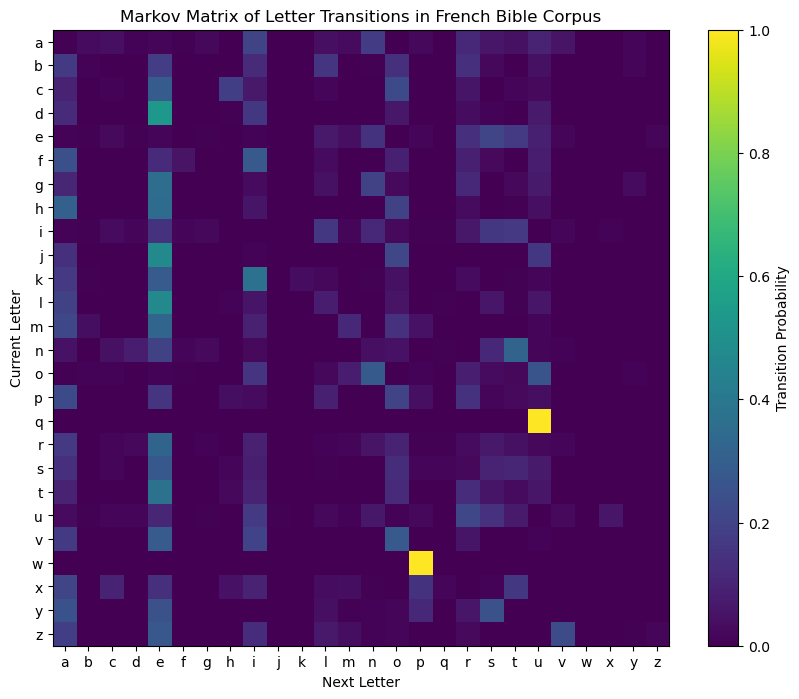

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(markov_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Transition Probability')
plt.xticks(ticks=np.arange(len(alphabet)), labels=list(alphabet))
plt.yticks(ticks=np.arange(len(alphabet)), labels=list(alphabet))
plt.xlabel('Next Letter')
plt.ylabel('Current Letter')
plt.title('Markov Matrix of Letter Transitions in French Bible Corpus')
plt.show()

In [18]:
# Making a function to random walk starting at a given letter
def random_walk(starting_letter, markov_matrix, steps=5, lazy=True):
	#TODO
	if lazy == False:
		# If the lazy parameter is True, set the probability of staying in the same state to 0.5
		markov_matrix = np.fill_diagonal(markov_matrix, 0)
		markov_matrix = markov_matrix / markov_matrix.sum(axis=1, keepdims=True)

	# Get the index of the starting letter in the alphabet
	current_index = alphabet.index(starting_letter)
	# Initialize a list to store the sequence of letters visited during the random walk
	sequence = [starting_letter]
	# Perform the random walk for the specified number of steps
	while len(sequence) < steps:
		# Get the transition probabilities for the current letter
		transition_probabilities = markov_matrix[current_index]
		# Choose the next letter based on the transition probabilities
		next_index = np.random.choice(len(alphabet), p=transition_probabilities)
		# Append the next letter to the sequence
		sequence.append(alphabet[next_index])
		# Update the current index for the next step
		current_index = next_index
	# Return the sequence of letters visited during the random walk
	return ''.join(sequence)

# Perform a random walk starting at the letter 'j' for 5 steps
random_sequence = random_walk('j', markov_matrix, steps=5)
print(f"Random Sequence Starting at 'j': {random_sequence}. \nMarkov chain generated french-like text")

Random Sequence Starting at 'j': jonge. 
Markov chain generated french-like text


In [19]:
# Hitting probabilities from a to b
simulation_size = 1000
cnt = 0
for i in range(simulation_size):
	walk = random_walk('a', markov_matrix, steps=10)
	if 'b' in walk:
		cnt += 1
print(f"Estimated probability of hitting 'b' starting from 'a' in 10 steps is: {cnt/simulation_size:.5f}")

Estimated probability of hitting 'b' starting from 'a' in 10 steps is: 0.04900


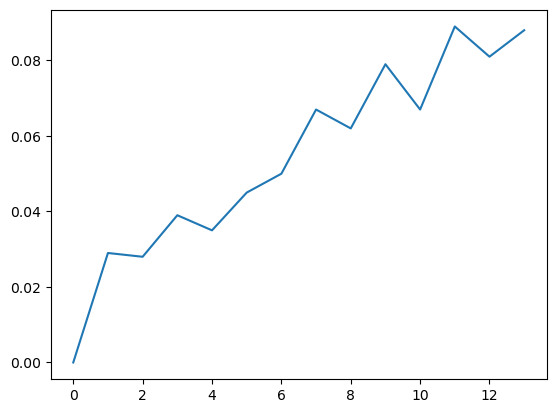

CPU times: user 1.02 s, sys: 9 ms, total: 1.03 s
Wall time: 1.01 s


In [20]:
%%time
def expected_hitting_probability(initial_state, target_state, steps=10, simulation_size=1000):
	cnt = 0
	for i in range(simulation_size):
		walk = random_walk(initial_state, markov_matrix, steps)
		if target_state in walk:
			cnt += 1
	return cnt/simulation_size

probabilities_at_steps = [expected_hitting_probability('a','b',i) for i in range(1, 15)]
plt.plot(probabilities_at_steps)
plt.show()


In [21]:
# Expected hitting time from a to b
def expected_hitting_time(initial_state, target_state, steps=100, simulation_size=1000):
	cnt = 0
	target_seen = []
	for i in range(simulation_size):
		walk = random_walk(initial_state, markov_matrix, steps)
		for idx, c in enumerate(walk):
			if c == target_state:
				target_seen.append(idx)
				break
		
	return np.array(target_seen).mean()

expected_hitting_time('a', 'b', steps=100)


41.85477178423236